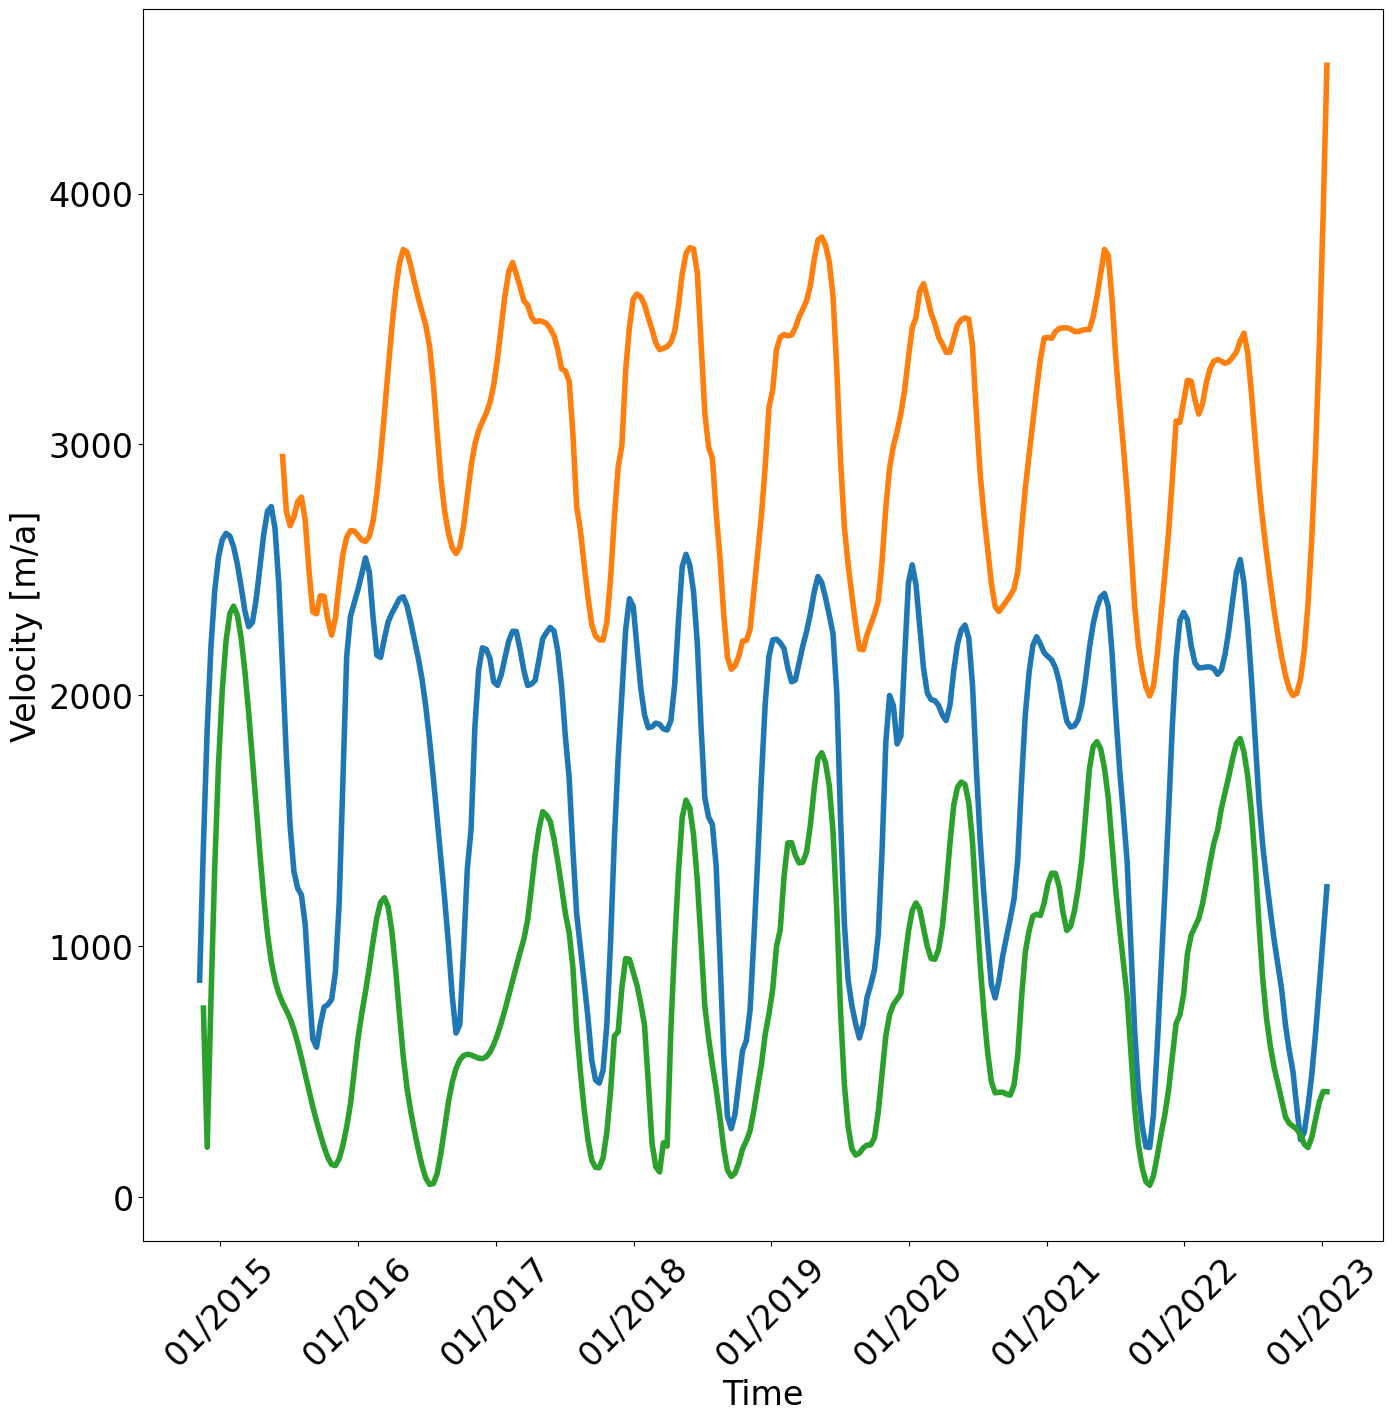

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray
import scipy
import pyproj

# from tqdm import tqdm
from scipy.signal import savgol_filter

fs = 24  # font size

# Create a larger figure
fig, ax = plt.subplots(figsize=(16, 16))


########################
# open dataset
year = "2016"
hubv = xarray.open_dataset("Datacubes/Hubbard_S1/Hubbard_S1.nc") #("../Hubbard_sentinel1.nc") ("../Hubbard_5eminus5.nc") 

########################
# load coordinates of points for velocity plots
points = pd.read_csv("centerline_points_3000m.csv")  # this is in ESPG: 3413

# coordinates of points of interest
# points_X = np.array([points.X[1], points.X[5]])  # specify your target x coordinate
# points_Y = np.array([points.Y[1], points.Y[5]])  # specify your target y coordinate

# dense points around ice fall

# load coordinates of points for velocity plots
points = pd.read_csv("centerline_points_1000m.csv")  # this is in ESPG: 3413

# Indices pts
indices = [13, 7]

# Get associated X,Y
points_X = points.X[indices]
points_Y = points.Y[indices]


########################
# get velocities at these locations from velocity datacube
v = [np.sqrt(hubv.vx.sel(x = X, y = Y, method = 'nearest')**2
             + hubv.vy.sel(x = X, y = Y, method = 'nearest')**2)
     for X, Y in zip(points_X, points_Y)]

# Plot vels
for i in range(len(v)):
    ax.plot(hubv.time, v[i], linewidth=4)

# Define the coordinate systems for conversion
epsg_32607 = pyproj.CRS("EPSG:32607")  # UTM zone 7N, WGS 84
epsg_3413 = pyproj.CRS("EPSG:3413")    # NSIDC Sea Ice Polar Stereographic North

# Define the transformer for the conversion
transformer = pyproj.Transformer.from_crs(epsg_32607, epsg_3413, always_xy=True)

# Valerie
x_32607 = 586400  # X coordinate
y_32607 = 6658400  # Y coordinate

#Hubbard point
# x_32607 = 590400  # X coordinate
# y_32607 = 6657500  # Y coordinate

# Perform the conversion to EPSG:3413
x_3413, y_3413 = transformer.transform(x_32607, y_32607)

target_valerie_x = np.abs(hubv.x.values - x_3413).argmin()
target_valerie_y = np.abs(hubv.y.values - y_3413).argmin()

valerie_vx = hubv.vx[:, target_valerie_y, target_valerie_x]
valerie_vy = hubv.vy[:, target_valerie_y, target_valerie_x]
valerie_v = np.sqrt(valerie_vx ** 2 + valerie_vy ** 2)

ax.plot(hubv.time, valerie_v, linewidth=4)

# Set x-axis label
ax.set_xlabel("Time", fontsize=fs)

# Set y-axis label
ax.set_ylabel("Velocity [m/a]", fontsize=fs)

# Set font size for tick labels
ax.tick_params(axis="both", which="major", labelsize=fs)

# Format x-axis to display month/year
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m/%Y"))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

########################

# Get all text objects in the figure
text_objs = plt.gcf().findobj(plt.Text)

# Change font size for all text objects
font_size = fs  # Change this to the font size you desire
for text_obj in text_objs:
    text_obj.set_fontsize(font_size)

plt.savefig("multiyear_centerline_velocities.png")


NameError: name 'datetime_index' is not defined

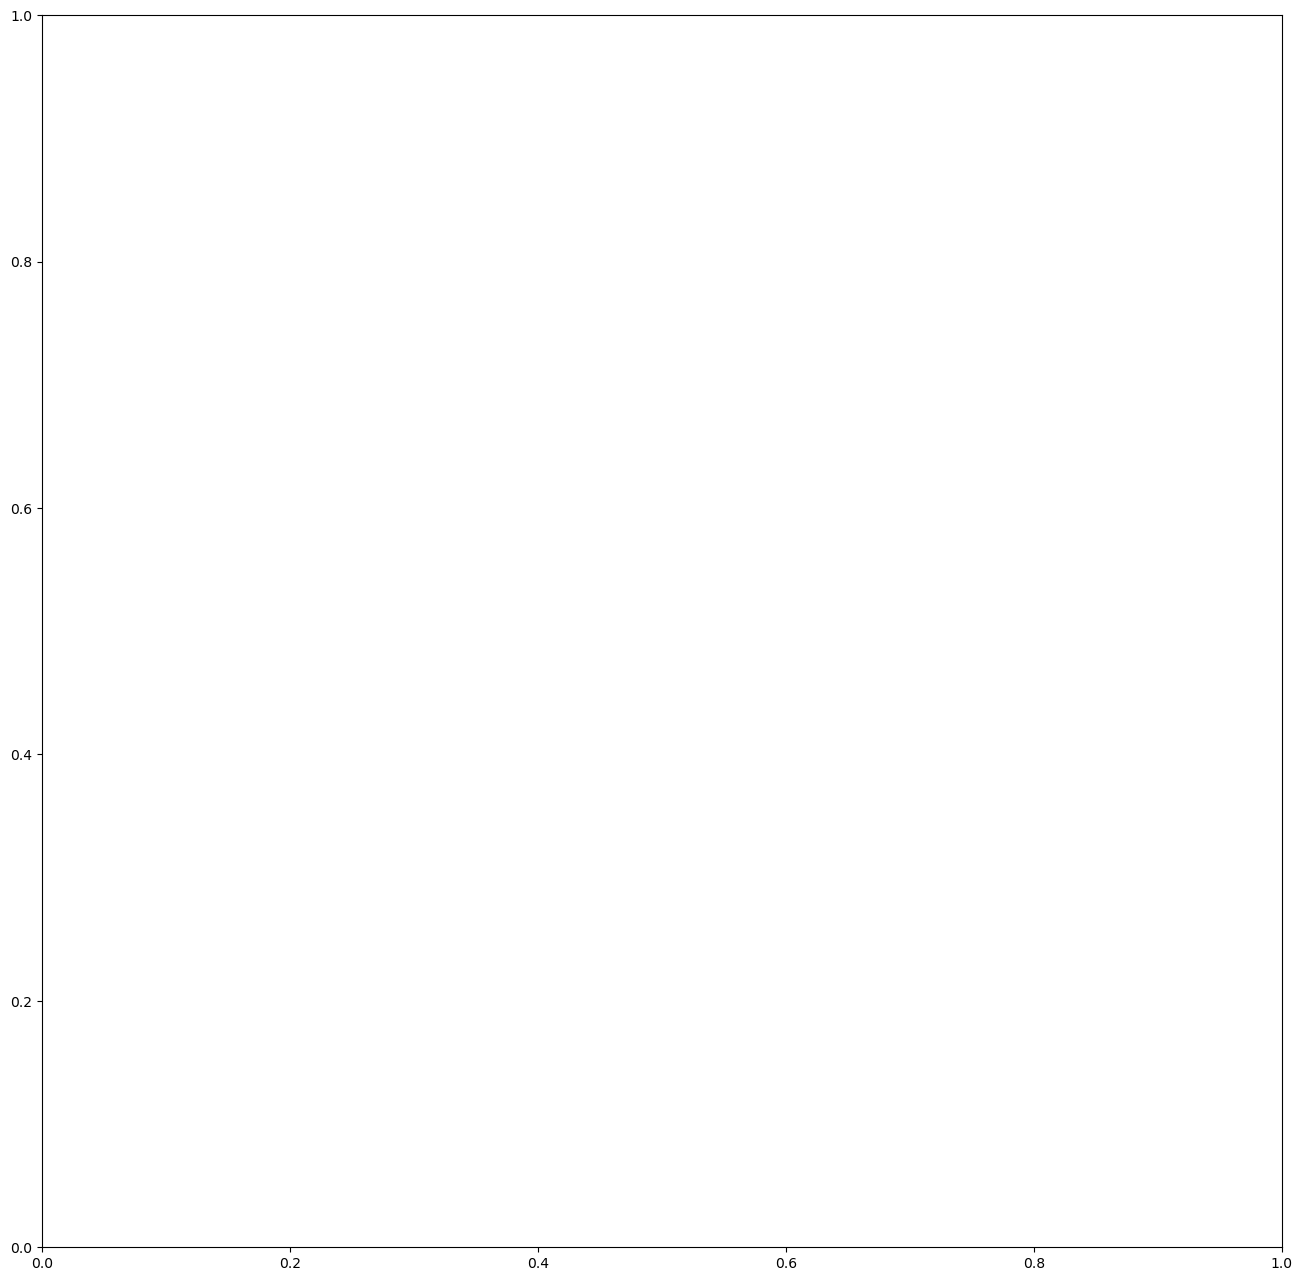

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import xarray
import scipy
import pyproj

# from tqdm import tqdm
from scipy.signal import savgol_filter

fs = 24  # font size

# Create a larger figure
fig, ax = plt.subplots(figsize=(16, 16))


########################
# open dataset
year = "2016"
hubv = xarray.open_dataset("Datacubes/Hubbard_S1/Hubbard_S1.nc") #("../Hubbard_sentinel1.nc") ("../Hubbard_5eminus5.nc") 

########################
# load coordinates of points for velocity plots
points = pd.read_csv("centerline_points_3000m.csv")  # this is in ESPG: 3413

# coordinates of points of interest
# points_X = np.array([points.X[1], points.X[5]])  # specify your target x coordinate
# points_Y = np.array([points.Y[1], points.Y[5]])  # specify your target y coordinate

# dense points around ice fall

# load coordinates of points for velocity plots
points = pd.read_csv("centerline_points_1000m.csv")  # this is in ESPG: 3413

# Indices pts
indices = [13, 7]

# Get associated X,Y
points_X = points.X[indices]
points_Y = points.Y[indices]


########################
# get velocities at these locations from velocity datacube
v = [np.sqrt(hubv.vx.sel(x = X, y = Y, method = 'nearest')**2
             + hubv.vy.sel(x = X, y = Y, method = 'nearest')**2)
     for X, Y in zip(points_X, points_Y)]

# Plot vels
for i in range(len(v)):
    ax.plot(datetime_index, v[i], linewidth=4)

# Define the coordinate systems for conversion
epsg_32607 = pyproj.CRS("EPSG:32607")  # UTM zone 7N, WGS 84
epsg_3413 = pyproj.CRS("EPSG:3413")    # NSIDC Sea Ice Polar Stereographic North

# Define the transformer for the conversion
transformer = pyproj.Transformer.from_crs(epsg_32607, epsg_3413, always_xy=True)

# Valerie
x_32607 = 586400  # X coordinate
y_32607 = 6658400  # Y coordinate

#Hubbard point
# x_32607 = 590400  # X coordinate
# y_32607 = 6657500  # Y coordinate

# Perform the conversion to EPSG:3413
x_3413, y_3413 = transformer.transform(x_32607, y_32607)

target_valerie_x = np.abs(hubv.x.values - x_3413).argmin()
target_valerie_y = np.abs(hubv.y.values - y_3413).argmin()

valerie_vx = hubv.vx[:, target_valerie_y, target_valerie_x]
valerie_vy = hubv.vy[:, target_valerie_y, target_valerie_x]
valerie_v = np.sqrt(valerie_vx ** 2 + valerie_vy ** 2)

ax.plot(datetime_index, valerie_v, linewidth=4)

# Set x-axis label
ax.set_xlabel("Time", fontsize=fs)

# Set y-axis label
ax.set_ylabel("Velocity [m/a]", fontsize=fs)

# Set font size for tick labels
ax.tick_params(axis="both", which="major", labelsize=fs)

# Format x-axis to display month/year
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter("%m/%Y"))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

########################

# Get all text objects in the figure
text_objs = plt.gcf().findobj(plt.Text)

# Change font size for all text objects
font_size = fs  # Change this to the font size you desire
for text_obj in text_objs:
    text_obj.set_fontsize(font_size)

plt.savefig("multiyear_centerline_velocities.png")


/tmp/ipykernel_62/1448632384.py:1: RuntimeWarning: Mean of empty slice
  plt.pcolormesh(hubv.x, hubv.y, np.nanmean(hubv.vx.values, axis = 0))


NameError: name 'x_3413' is not defined

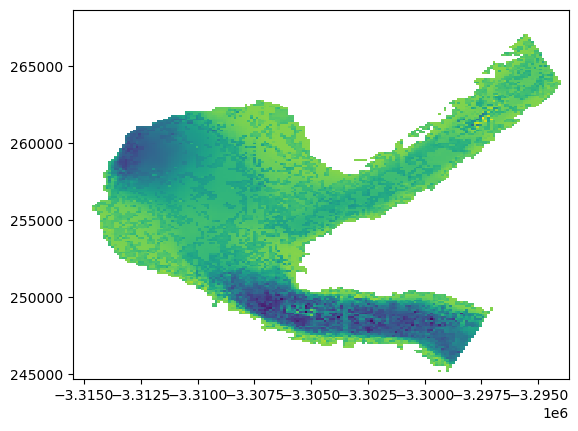

In [2]:
plt.pcolormesh(hubv.x, hubv.y, np.nanmean(hubv.vx.values, axis = 0))
plt.scatter(x_3413, y_3413)
plt.scatter(points_X[1], points_Y[1])

In [25]:
v = [np.sqrt(hubv.vx.sel(x = X, y = Y, method = 'nearest')**2
             + hubv.vy.sel(x = X, y = Y, method = 'nearest')**2)
     for X, Y in zip(points_X, points_Y)]